### Case Study #07- Supervised Learning

Objectives :
    

1.Read the dataset to the python environment.

2.Do necessary pre-processing steps.

3.Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [67]:
df = pd.read_excel('iris.xls')
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### 2. pre-processing steps

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [69]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Insights from the dataset

->Seems like only float and object datatypes are there

->columns with float and a single column with object data type

->Only column PW(Petal.Width) has values in all the rows

->Average lenth of Sepal and Petal are 5.855944,3.756250 respectively

->Average width of Sepal and Petal are 3.049306, 1.198667 respectively

In [70]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [71]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [72]:
# We can see null values in Sepal length, Sepal width and Petal lenth

In [73]:
df['SL'].fillna(df['SL'].median(), inplace=True)
df['SW'].fillna(df['SL'].median(), inplace=True)
df['PL'].fillna(df['SL'].median(), inplace=True)

df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [74]:
# We filled all the missing values

In [75]:
# Displaying all the rows with duplicated values:

In [76]:
df[df.duplicated(keep=False)]

,SL,SW,PL,PW,Classification
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


In [77]:
# Displaying the unique values in each feature

In [78]:
df.nunique()

SL                35
SW                24
PL                43
PW                22
Classification     3
dtype: int64

Text(0.5, 1.0, 'Box plot of dataset')

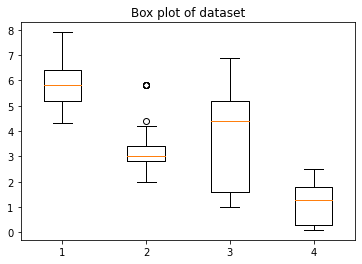

In [79]:
# Checking for outliers

plt.boxplot(df[['SL','SW','PL','PW']])
plt.title('Box plot of dataset')

In [80]:
# We can see couple of outliers in SW, as they are lesser in number we are not removing them

In [81]:
# Here we have a categorical column 'Classification' we have to convert it into numerical

In [82]:
# Onehot Encoding

In [63]:
# Let us split the dataset in to features and targets

In [84]:
x = df.drop(['Classification'],axis = 1)
y = df['Classification']

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = 0.2)

In [55]:
# We are going to check how many datapoints are there in the trainingset

In [86]:
x_train.shape

(120, 4)

In [87]:
y_train.shape

(120,)

In [88]:
# Shows that 120 data points are there for training set and 30 data points for test set

### Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression
Logit_model = LogisticRegression()
Logit_model.fit(x_train,y_train)
y_pred = Logit_model.predict(x_test)

C:\Users\vipin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score, confusion_matrix

In [94]:
print("Accuracy is :",accuracy_score(y_test,y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred,pos_label='positive',average='micro'))

Accuracy is : 0.9666666666666667
Precision Score :  0.9666666666666667
Recall Score :  0.9666666666666667


C:\Users\vipin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\vipin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [95]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [96]:
#There are 8 misclassifications

### Decision Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
dt_model = DecisionTreeClassifier()

In [102]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [103]:
y_pred = dt_model.predict(x_test)

In [104]:
print("The accuracy score is :",accuracy_score(y_test,y_pred))

The accuracy score is : 0.9666666666666667


In [105]:
y_test.value_counts()

Iris-virginica     11
Iris-setosa        10
Iris-versicolor     9
Name: Classification, dtype: int64

In [106]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

### Linear SVM

In [110]:
from sklearn.svm import SVC
# SVC : Support Vector Classifier

In [111]:
svm_linear = SVC(kernel = "linear")
# Specifying that the SVM is linear type

In [112]:
svm_linear.fit(x_train,y_train)
# Training the model using with fit method

SVC(kernel='linear')

In [113]:
y_pred = svm_linear.predict(x_test)

In [114]:
print("The accuracy score is : ",accuracy_score(y_test,y_pred))

The accuracy score is :  0.9666666666666667


### Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
# Training the model
rf.fit(x_train,y_train)
# After training we are predicting with the help of x_test
y_pred = rf.predict(x_test)

In [116]:
from sklearn.metrics import f1_score,confusion_matrix

In [120]:
f1_score(y_test,y_pred,pos_label='positive',average='micro')

C:\Users\vipin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


0.9666666666666667

In [121]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [122]:
# All the classification models performs good